<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/jds.png" style="height: 100px;" align=right> 

# JDS Capstone

You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest promotion. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="../images/MicrosoftTeams-image.png" style="height: 700px">

## Objective
**Design a predictive model to determine the potential customers.** The target variable is `Potential_Customer`. 

**Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

## Submission Guideline

Perform the following:

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Data Pre-Processing**: Make data usable for applying ML algorithms. 
    6. **Model Design**: Create several predictive models and tune the hyperparameters
    7. **Model Evaluation**: Compare the performance of the models
    8. **Bonus**: Any creative idea for improving machine learning models

The output expected at the end of this capstone is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class. 

**One zip file per group** is to be uploaded on **GDrive** by the **time** that will be given to you by the trainer, including the **jupyter notebook(s)** and the **powerpoint presentation** indicating the **names of all group members**.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

# Table of Content

- [JDS Capstone](#JDS-Capstone)
- [Data description](#Data-description)
- [Objective](#Objective)
- [Submission Guideline](#Submission-Guideline)
- [Presentation Guideline](#Presentation-Guideline)
- [Table of Content](#Table-of-Content)
- [0. Import necessary Packages](#-<font-color=green-0.-Import-necessary-Packages<font>)
- [1. Load the Data into Pandas Dataframe](#<font-color=green-1.-Load-the-Data-into-Pandas-Dataframe<font>)
- [2. Data Cleaning](#<font-color=green2.-Data-Cleaning<font>)
    - [2.1 How big is the dataset? (number of rows, features and total datapoints)](#2.1-How-big-is-the-dataset?-(number-of-rows,-features-and-total-datapoints))
    - [2.2 What is the type of each column?](#2.2-What-is-the-type-of-each-column?)
        - [2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.](#2.2.1-Why-columns-such-as-`Cust_Last_Purchase`-are-`object`-while-they-should-be-`float64`?-Fix-the-type-of-the-columns-as-it-should-be.)
    - [2.3 Check data for duplicate rows and remove the duplicates](#2.3-Check-data-for-duplicate-rows-and-remove-the-duplicates)
    - [2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.](#2.4-Do-we-need-`C_ID`-in-our-analysis?-Drop-the-columns-you-will-not-use-in-your-analysis,-if-there-is-any.)
- [3. Exploratory Data Analysis (EDA)](#<font-color=green3.-Exploratory-Data-Analysis-(EDA)<font>)
    - [3.1 Explore Categorical Variables](#3.1-Explore-Categorical-Variables)
        - [3.1.1 Insight](#3.1.1-Insight)
        - [3.1.2 Solution](#3.1.2-Solution)
    - [3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation](#3.2-Explore-Relationship-Between-Categorical-&-Target-Variable.-Interpret-the-observation)
        - [3.2.1. Insight](#3.2.1.-Insight)
    - [3.3 Explore Numerical Variables](#3.3-Explore-Numerical-Variables)
        - [3.3.1 Insight](#3.3.1-Insight)
        - [3.3.2 Check the Data for Missing Values](#3.3.2-Check-the-Data-for-Missing-Values)
    - [3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation](#3.4-Explore-the-Relationship-between-Numerical-Variables-&-Target-Variable.-Interpret-your-observation)
    - [3.5 Explore the Relationship between the columns and try to answer the following questions:](#3.5-Explore-the-Relationship-between-the-columns-and-try-to-answer-the-following-questions:)
- [4. Feature Enginearing](#<font-color=green4.-Feature-Enginearing<font)
    - [4.1 Add Some High Level Features and explore their relationship with the target variable](#4.1-Add-Some-High-Level-Features-and-explore-their-relationship-with-the-target-variable)
    - [4.2 Check Correlation between Numerical Variables](#4.2-Check-Correlation-between-Numerical-Variables)
- [5. Feature Selection](#<font-color=green5.-Feature-Selection<font)
- [6. Data PreProcessing](#<font-color=green6.-Data-PreProcessing<font)
    - [6.1 Separate X (features) and y (target)](#6.1-Separate-X-(features)-and-y-(target))
    - [6.2 Dummy Variables](#6.2-Dummy-Variables)
    - [6.3 Split data to train/test](#6.3-Split-data-to-train/test)
    - [6.4 Feature Scaling](#6.4-Feature-Scaling)
    - [6.5 PCA on Numerical Columns only](#6.5-PCA-on-Numerical-Columns-only)
- [7. Machine Learning](#<font-color=green7.-Machine-Learning<font)

#  <font color=green> 0. Import necessary Packages<font>

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# <font color=green> 1. Load the Data into Pandas Dataframe<font>

In [2]:
# Load the data into data dataframe
data = pd.read_csv('../data.csv')

In [3]:
# View first 5 rows of dataframe
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [5]:
# View your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# <font color=green>2. Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [6]:
data.shape

(4469, 25)

## 2.2 What is the type of each column?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [4]:
list_dollar=data.columns
for x in list_dollar:
    try:
        data[x]=data[x].str.replace('$','')
        data[x]=data[x].str.replace(',','')
    except:
        data[x]=data[x].replace('$','')
        data[x]=data[x].replace(',','')

In [5]:
CatCols=['Cust_Prop','Status_Cust','Gender','Status_Latest_Ad','Potential_Customer']
NumCols=list(set(data.columns)-set(CatCols))


In [6]:
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [7]:
data.duplicated().sum()

851

In [8]:
data=data.drop_duplicates()

## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [9]:
data=data.drop('C_ID',axis=1)
NumCols.remove('C_ID')

# <font color=green>3. Exploratory Data Analysis (EDA)<font>
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.

## 3.1 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


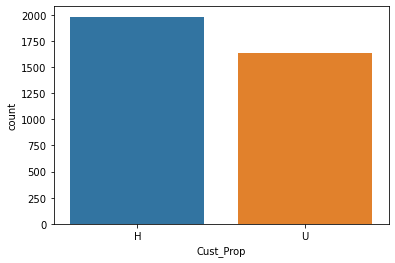

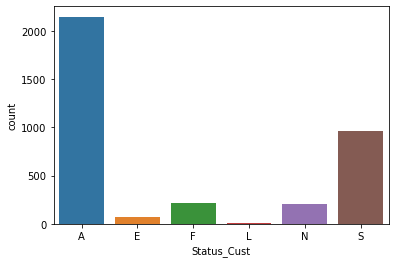

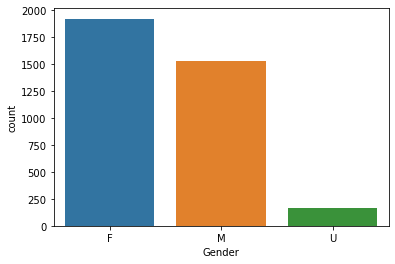

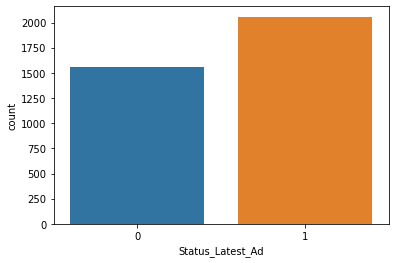

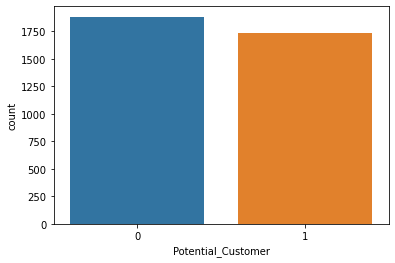

In [10]:
for i,x in enumerate(data[CatCols]):
    plt.figure(i)
    sns.countplot(x=x, data=data)

### 3.1.1 Insight

In [ ]:
# most of the people in the dataset is an active buyer
# There are 10% more female in the dataset and around 

### 3.1.2 Solution

In [11]:
for x in data[CatCols]:
    total=data[x].unique()
    print(x,total)

Cust_Prop ['H', 'U']
Categories (2, object): ['H', 'U']
Status_Cust ['A', 'S', 'E', 'F', 'N', 'L']
Categories (6, object): ['A', 'S', 'E', 'F', 'N', 'L']
Gender ['F', 'M', 'U']
Categories (3, object): ['F', 'M', 'U']
Status_Latest_Ad [0, 1]
Categories (2, int64): [0, 1]
Potential_Customer [1, 0]
Categories (2, int64): [1, 0]


In [12]:
# What proportion/percentage from each category?
for x in data[CatCols]:
    total = data[x].value_counts(normalize=True)*100
    print(total)

H    54.754008
U    45.245992
Name: Cust_Prop, dtype: float64
A    59.314538
S    26.644555
F     6.053068
N     5.721393
E     1.990050
L     0.276396
Name: Status_Cust, dtype: float64
F    53.123273
M    42.288557
U     4.588170
Name: Gender, dtype: float64
1    56.854616
0    43.145384
Name: Status_Latest_Ad, dtype: float64
0    52.017689
1    47.982311
Name: Potential_Customer, dtype: float64


## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

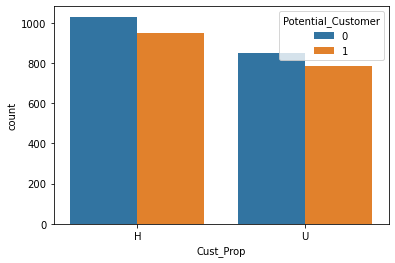

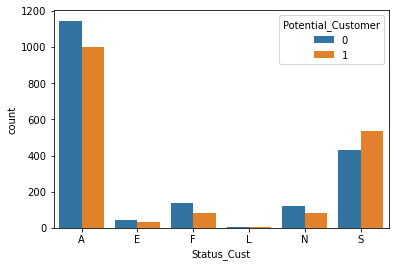

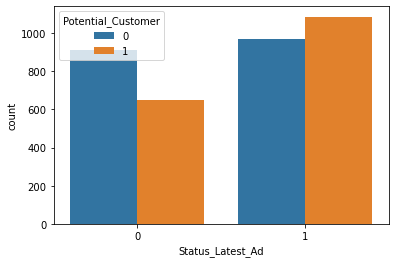

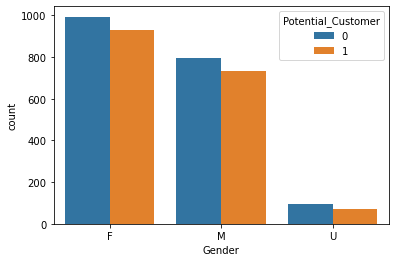

In [13]:
CatFes=list(set(CatCols)-set(['Potential_Customer']))
for i,x in enumerate(data[CatFes]):
    plt.figure(i)
    sns.countplot(x=x, data=data,hue=data.Potential_Customer)

### 3.2.1. Insight

In [ ]:
# Female has high tendency to spent compare to male. Female also higher tendency to become potential customer
# individual made purchase in response to last promotional sale tend to become potential customer. Individual who did not response to last promotional sale tend to not become potential customer
# Active buyer is very highly likelyto become potential buyer compare to others

## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

<Figure size 432x288 with 0 Axes>

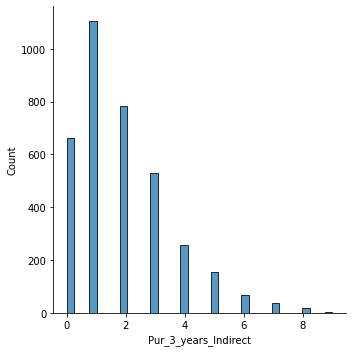

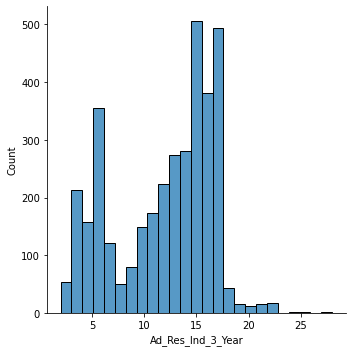

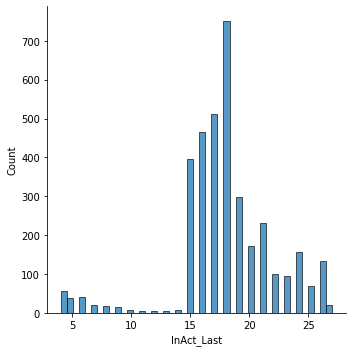

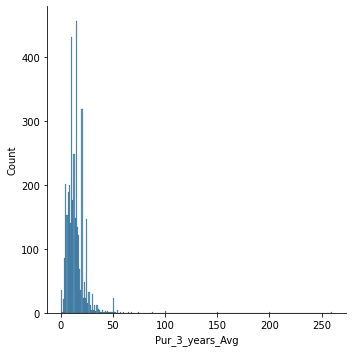

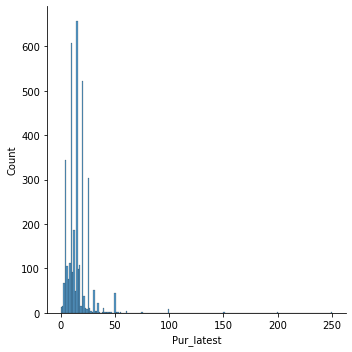

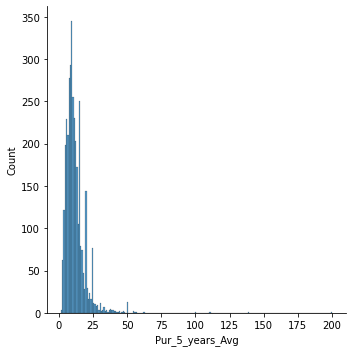

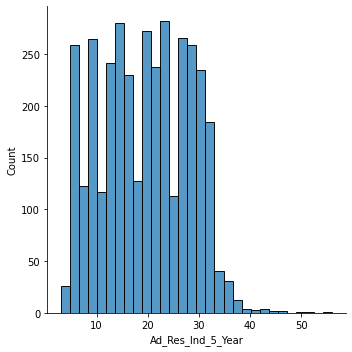

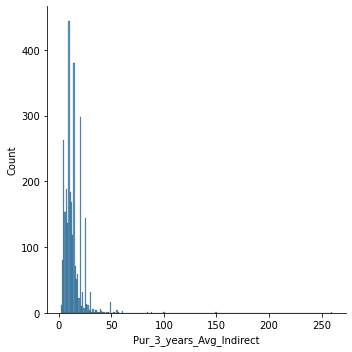

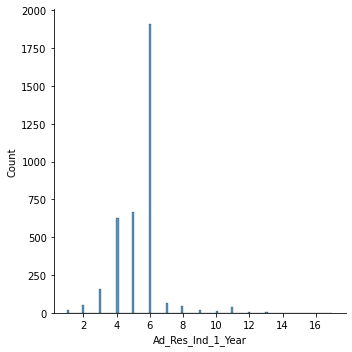

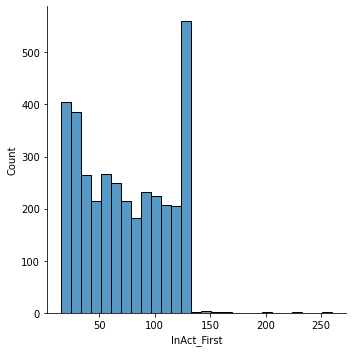

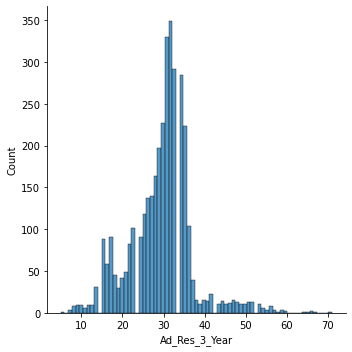

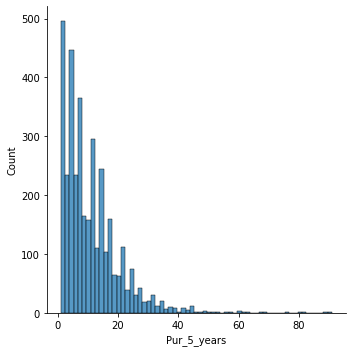

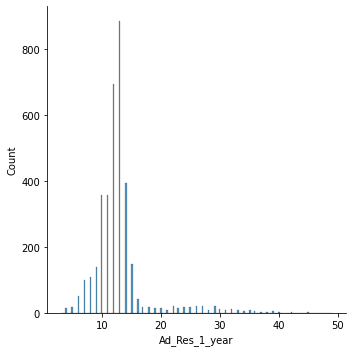

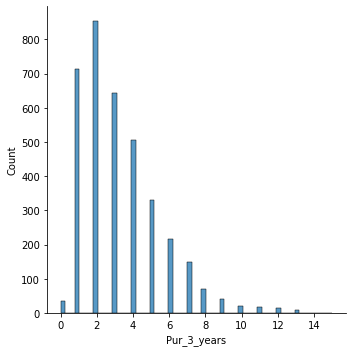

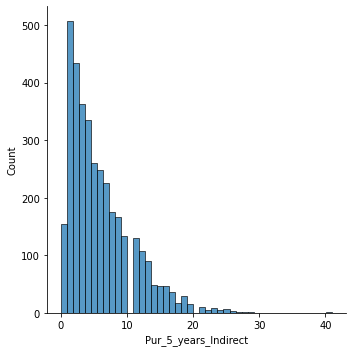

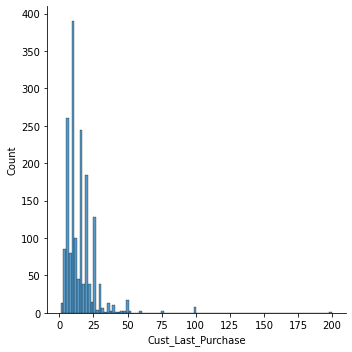

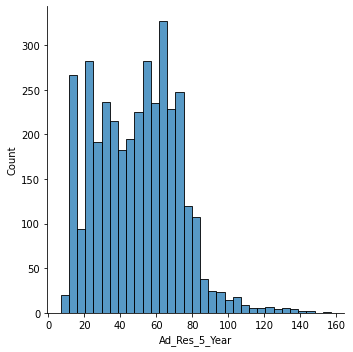

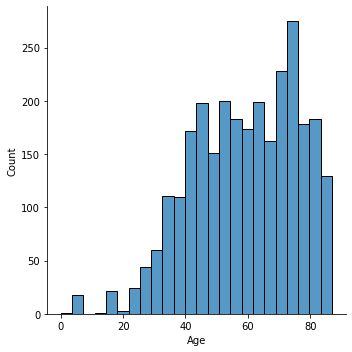

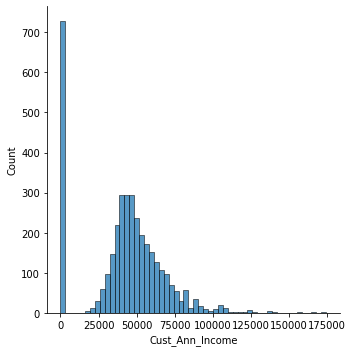

In [18]:
for i,x in enumerate(data[NumCols]):
    
    plt.figure(i)
    sns.displot(data[x]);

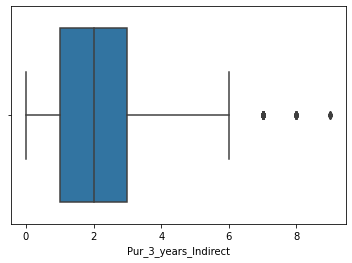

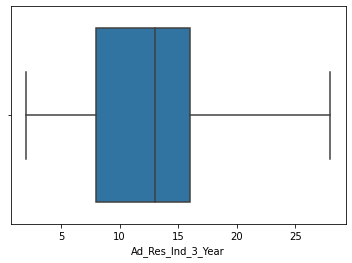

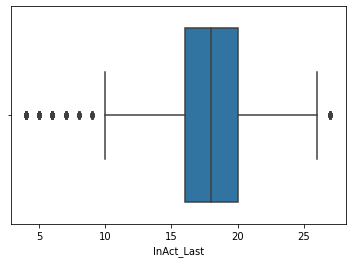

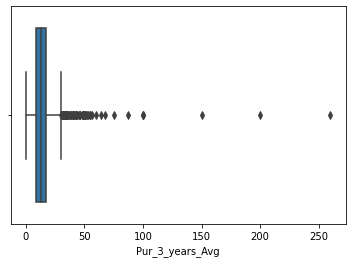

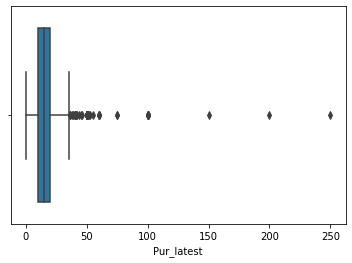

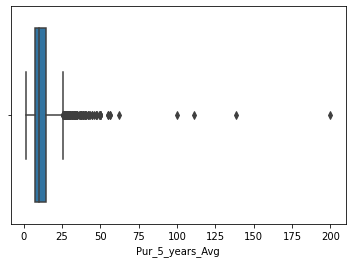

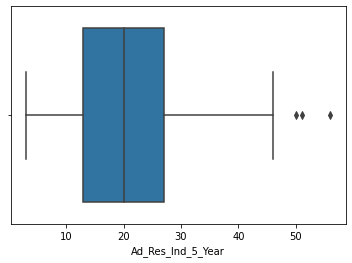

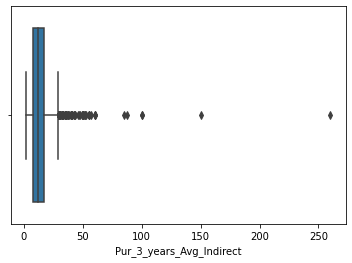

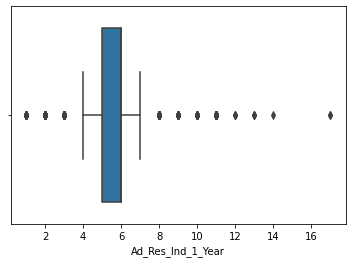

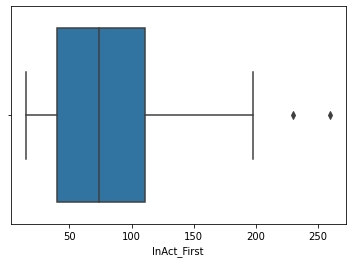

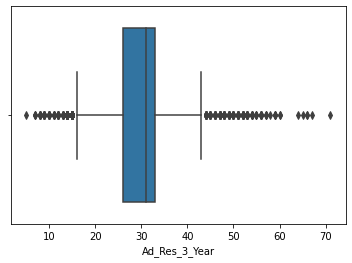

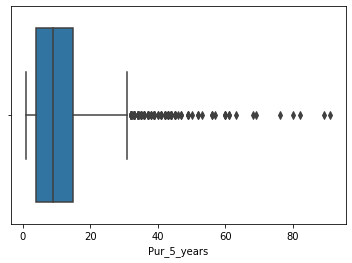

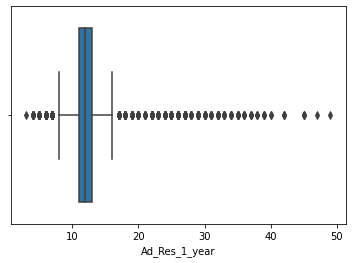

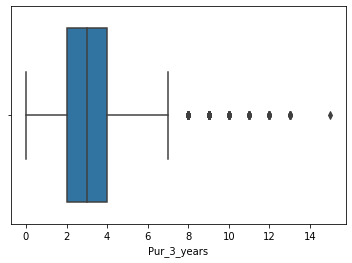

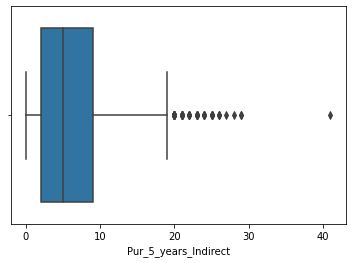

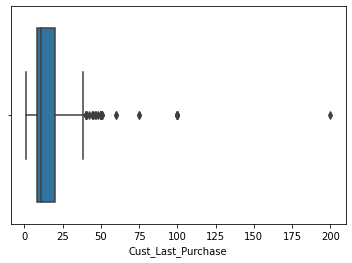

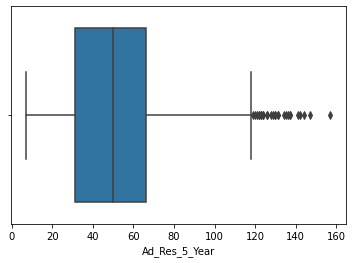

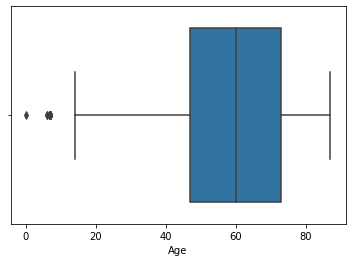

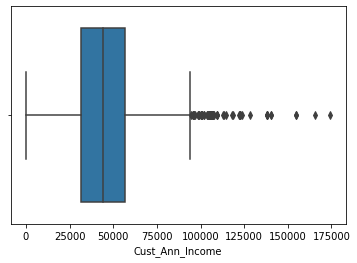

In [20]:
for i,x in enumerate(data[NumCols]):
    
    plt.figure(i)
    sns.boxplot(data[x])

### 3.3.1 Insight

In [ ]:
#Most of data is highly skewed. Thus we decided to replace the NaN values with median of each respectative feature.

## 3.3.2 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

In [14]:
# Create a list of the name of the columns that have missing values
null_columns = data.columns[data.isnull().any()]
null_columns

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')

In [15]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[NumCols]=imputer.fit_transform(data[NumCols])

## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

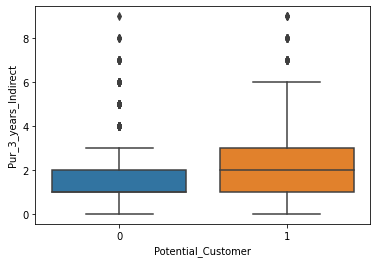

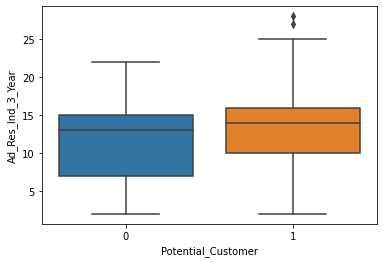

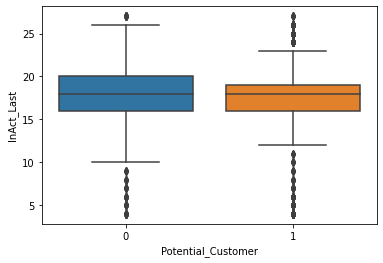

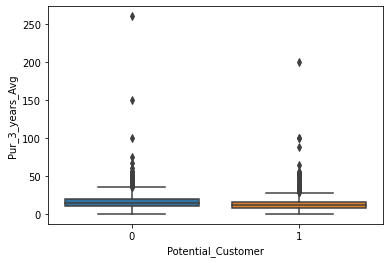

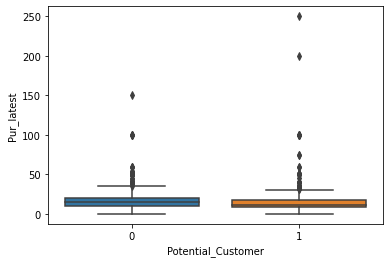

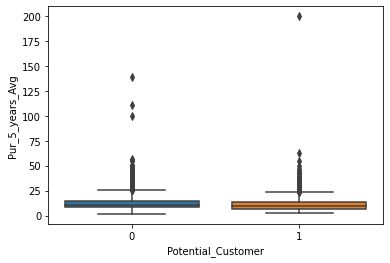

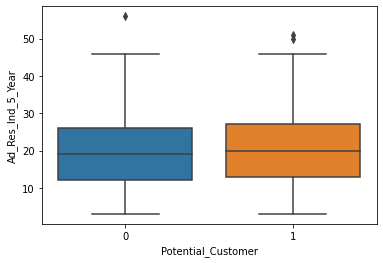

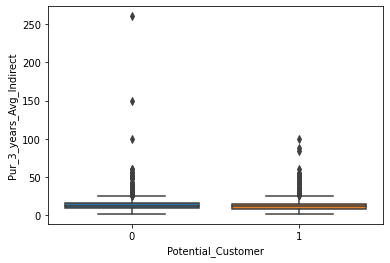

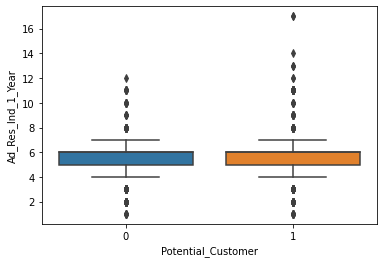

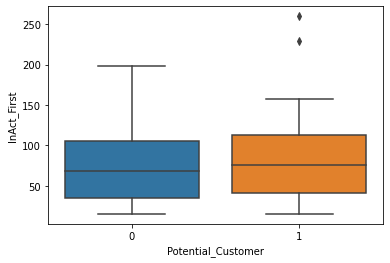

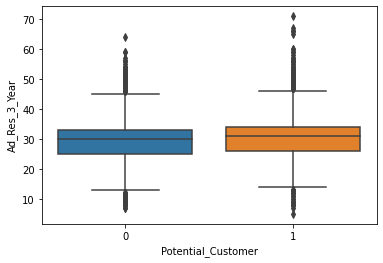

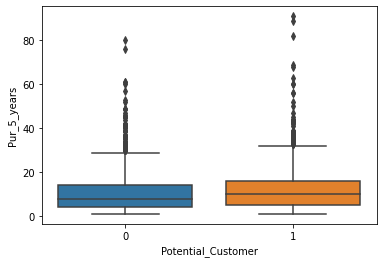

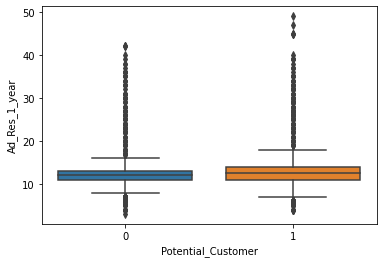

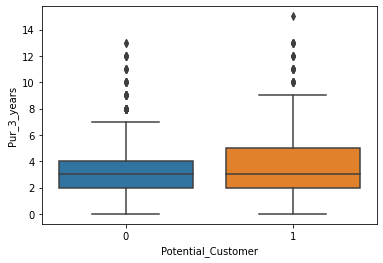

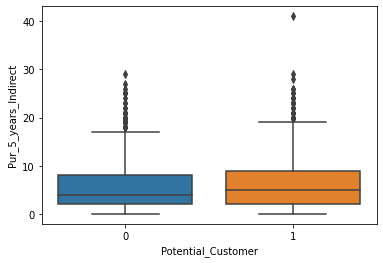

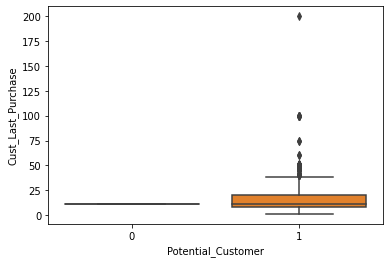

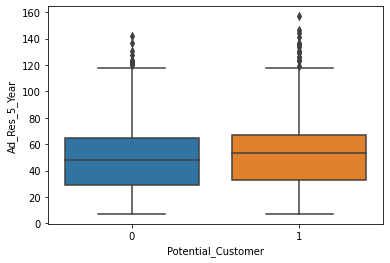

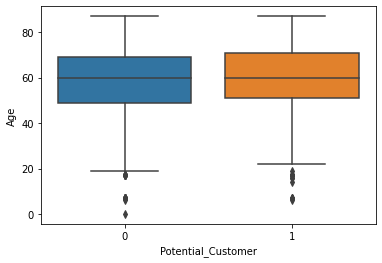

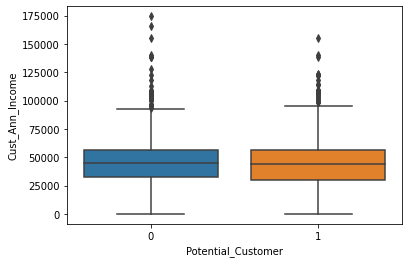

In [24]:
for i,x in enumerate(data[NumCols]):
    plt.figure(i)
    sns.boxplot(data=data,x='Potential_Customer',y=x)

In [ ]:
# Both expenditure of potential and not potential customer for the last past 5 years are almost the same
# The trend of inactive no of month since customer made the last purchase is quite diverse and have many outlier regardless they are potential customer or not
# At first glance, we can not see any significance correlation between the numerical variable and target variable

## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

<AxesSubplot:xlabel='Gender', ylabel='Cust_Ann_Income'>

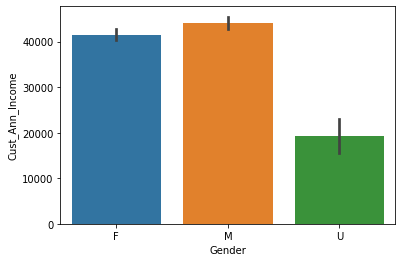

In [25]:
#1
sns.barplot(x="Gender", y="Cust_Ann_Income", data=data)

<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years'>

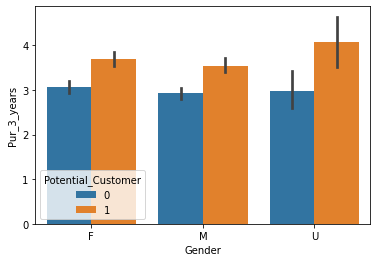

In [44]:
#2
sns.barplot(x="Gender", y="Pur_3_years",hue='Potential_Customer',data=data)

<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years_Avg'>

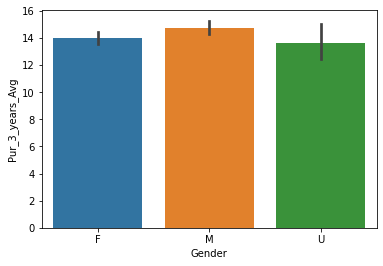

In [38]:
#3
sns.barplot(x="Gender", y="Pur_3_years_Avg", data=data,estimator=np.mean)

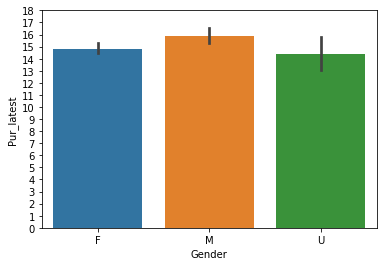

In [37]:
#4
sns.barplot(x="Gender", y="Pur_latest", data=data,estimator=np.mean)
plt.yticks(np.arange(0,19));

<AxesSubplot:xlabel='Potential_Customer', ylabel='Ad_Res_5_Year'>

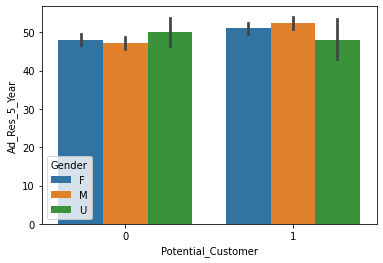

In [46]:
#5

sns.barplot(x="Potential_Customer", y="Ad_Res_5_Year",hue='Gender', data=data,estimator=np.mean)

# <font color=green>4. Feature Enginearing<font>

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

In [47]:
data["total_pur_3_year"]=data.Pur_3_years*data.Pur_3_years_Avg
data["total_pur_5_year"]=data.Pur_5_years*data.Pur_5_years_Avg
data["Pur_3_years_Direct"]=data.Pur_3_years-data.Pur_3_years_Indirect
data["Pur_5_years_Direct"]=data.Pur_5_years-data.Pur_5_years_Indirect

## 4.2 Check Correlation between Numerical Variables

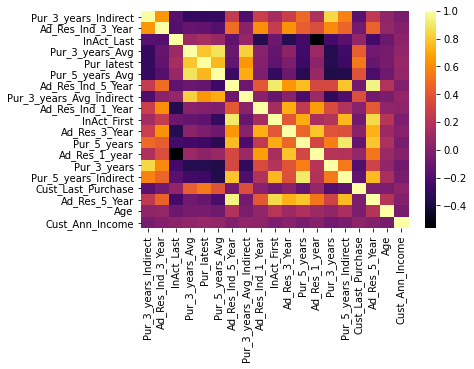

In [49]:
data[NumCols].corr()
sns.heatmap(data[NumCols].corr(),cmap='inferno');

# <font color=green>5. Feature Selection<font>

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

# <font color=green>6. Data PreProcessing<font>

## 6.1 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis

In [55]:
data2=data.copy()

X=data2.iloc[:,1:]
y=data2['Potential_Customer']


In [ ]:
CatCols.remove('Potential_Customer')

## 6.2 Dummy Variables
Change categorical variables with numerical variabels

In [56]:
X_dum= pd.get_dummies(X[CatCols], drop_first=True).reset_index(drop=True)
X=pd.concat([X,X_dum],axis=1)
X=X.drop(CatCols,axis=1)

## 6.3 Split data to train/test 

Split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

## 6.4 Feature Scaling

In [58]:
NewCatCols=X.select_dtypes(include=['uint8'])
NewCatCols=NewCatCols.columns
NewNumCols=X.select_dtypes(include=['float64'])
NewNumCols=NewNumCols.columns

In [60]:
scaler= PowerTransformer().fit(X_train[NewNumCols])
X_train_s=pd.DataFrame(scaler.fit_transform(X_train[NewNumCols]),columns=X[NewNumCols].columns)
X_test_s=pd.DataFrame(scaler.transform(X_test[NewNumCols]),columns=X[NewNumCols].columns)

## 6.5 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
`X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)`
2. Separate train and test data for numerical columns only
`train_PCA=X_train_sc[NewNumCols]`, `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

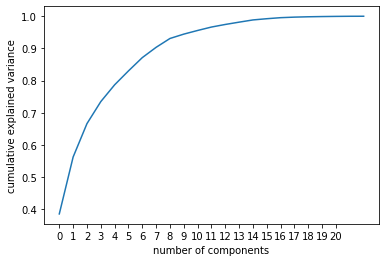

In [61]:
pca = PCA().fit(X_train_s[NewNumCols]) # Tak boleh pakai train sahaja
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.xticks(np.arange(0,21))
plt.ylabel('cumulative explained variance');

In [62]:
pca = PCA(n_components=8)
pca.fit(X_train_s[NewNumCols])

PCA(n_components=8)

In [63]:
X_train_pca=pd.DataFrame(pca.transform(X_train_s[NewNumCols]))
X_test_pca=pd.DataFrame(pca.transform(X_test_s[NewNumCols]))

In [64]:
X_train_pca.index=X_train.index
X_test_pca.index=X_test.index
X_train_pca=pd.concat([X_train_pca,X_train[NewCatCols]],axis=1)
X_test_pca=pd.concat([X_test_pca,X_test[NewCatCols]],axis=1)

# <font color=green>7. Machine Learning<font>

Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model. You can 

## Logistic Regression

In [65]:
logr_param_grid = {'C': np.logspace(-3,3,10),
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False],
                   'solver':['newton-cg''saga','lbfgs','liblinear']}

logr_grid = GridSearchCV(LogisticRegression(), 
                        logr_param_grid, cv=5, scoring = 'roc_auc')
logr_grid.fit(X_train_pca,y_train)
print('LogisticRegression Best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

LogisticRegression Best parameters {'C': 0.001, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression best score =  0.5834126345025059


In [66]:
logr_model = logr_grid.best_estimator_
logr_model.fit(X_train_pca,y_train)
predicted_logr=logr_model.predict(X_test_pca)
print('Accuracy on Test: ',logr_model.score(X_test_pca, y_test)) 
print('Accuracy on Train: ',logr_model.score(X_train_pca, y_train))

Accuracy on Test:  0.56353591160221
Accuracy on Train:  0.5757464061924069


In [68]:
lr_confusion =confusion_matrix(y_test, predicted_logr)
print('Logistic regression classifier confusion matrix (default settings)\n', lr_confusion)
print('**************************************\n')
print('Logistic regression classification report\n', 
   classification_report(y_test, predicted_logr, target_names=['not 1', '1']))

print('**************************************\n')
print('Logistic regression roc score\n')
print(roc_auc_score(y_test, predicted_logr))

Logistic regression classifier confusion matrix (default settings)
 [[259 212]
 [185 249]]
**************************************

Logistic regression classification report
               precision    recall  f1-score   support

       not 1       0.58      0.55      0.57       471
           1       0.54      0.57      0.56       434

    accuracy                           0.56       905
   macro avg       0.56      0.56      0.56       905
weighted avg       0.56      0.56      0.56       905

**************************************

Logistic regression roc score

0.5618132808907413


## KNN Classiffier

In [69]:
knn_param_grid = {'n_neighbors': np.arange(1, 20),
                  'p': [1,2],
                 }
                   

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                        knn_param_grid, cv=5, scoring = 'roc_auc')
knn_grid.fit(X_train_pca, y_train)
print('Knn Best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_
print('Knn best score = ',knn_grid.best_score_ )

Knn Best parameters {'n_neighbors': 19, 'p': 2}
Knn best score =  0.5696761635065535


In [70]:
knn_model.fit(X_train_pca,y_train)
predicted_knn=knn_model.predict(X_test_pca)
print(knn_model.score(X_train_pca, y_train))
print(knn_model.score(X_test_pca, y_test))

0.6221894581643936
0.5679558011049723


In [71]:
knn_confusion =confusion_matrix(y_test, predicted_knn)
print('KNN classifier confusion matrix (default settings)\n', knn_confusion)
print('**************************************\n')
print('KNN classification report\n', 
classification_report(y_test, predicted_knn, target_names=['not 1', '1']))

print('**************************************\n')
print('KNN roc score\n')
print(roc_auc_score(y_test, predicted_knn))

KNN classifier confusion matrix (default settings)
 [[304 167]
 [224 210]]
**************************************

KNN classification report
               precision    recall  f1-score   support

       not 1       0.58      0.65      0.61       471
           1       0.56      0.48      0.52       434

    accuracy                           0.57       905
   macro avg       0.57      0.56      0.56       905
weighted avg       0.57      0.57      0.57       905

**************************************

KNN roc score

0.5646531059516472


## Decision Tree Analysis

In [72]:
dt_param_grid = {'max_depth': np.arange(1, 20)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc')
dt_grid.fit(X_train_pca, y_train)
print('DecosionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecosionTree best score = ',dt_grid.best_score_ )

DecosionTree Best parameters {'max_depth': 4}
DecosionTree best score =  0.5570466682249695


In [73]:
dt_model.fit(X_train_pca, y_train)
predicted_dt=dt_model.predict(X_test_pca)

print("Accuracy on training set: {:.3f}".format(dt_model.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dt_model.score(X_test_pca, y_test)))

Accuracy on training set: 0.591
Accuracy on test set: 0.552


In [74]:
dt_confusion =confusion_matrix(y_test,predicted_dt)
print('DT classifier confusion matrix (default settings)\n', dt_confusion)
print('**************************************\n')
print('DT classification report\n', 
classification_report(y_test, predicted_dt, target_names=['not 1', '1']))

print('**************************************\n')
print('DT roc score\n')
print(roc_auc_score(y_test,predicted_dt))

DT classifier confusion matrix (default settings)
 [[262 209]
 [196 238]]
**************************************

DT classification report
               precision    recall  f1-score   support

       not 1       0.57      0.56      0.56       471
           1       0.53      0.55      0.54       434

    accuracy                           0.55       905
   macro avg       0.55      0.55      0.55       905
weighted avg       0.55      0.55      0.55       905

**************************************

DT roc score

0.5523251832066296


## SVM Classification

In [75]:
svc_param_grid = {'C': np.logspace(-1,1,10),
                  'kernel' : ['linear', 'rbf'],
                  'gamma': np.logspace(-1,1,10)}

svc_grid = GridSearchCV(SVC(), 
                        svc_param_grid, cv=3, scoring = 'roc_auc')
svc_grid.fit(X_train_pca, y_train)
print('LogisticRegression Best parameters', svc_grid.best_params_)
svc_model = svc_grid.best_estimator_
print('LogisticRegression best score = ',svc_grid.best_score_ )

LogisticRegression Best parameters {'C': 0.16681005372000587, 'gamma': 0.1, 'kernel': 'rbf'}
LogisticRegression best score =  0.5984648107057385


In [76]:
svc_model.fit(X_train_pca, y_train)
predicted_svm=svc_model.predict(X_test_pca)
print("Model test accuracy: {:.2f}".format(svc_model.score(X_test_pca, y_test)))
print("Model train accuracy: {:.2f}".format(svc_model.score(X_train_pca, y_train)))

Model test accuracy: 0.59
Model train accuracy: 0.62


In [77]:
svm_confusion =confusion_matrix(y_test,predicted_svm)
print('SVM classifier confusion matrix (default settings)\n', svm_confusion)
print('**************************************\n')
print('SVM classification report\n', 
classification_report(y_test, predicted_svm, target_names=['not 1', '1']))

print('**************************************\n')
print('SVM roc score\n')
print(roc_auc_score(y_test, predicted_svm))

SVM classifier confusion matrix (default settings)
 [[383  88]
 [284 150]]
**************************************

SVM classification report
               precision    recall  f1-score   support

       not 1       0.57      0.81      0.67       471
           1       0.63      0.35      0.45       434

    accuracy                           0.59       905
   macro avg       0.60      0.58      0.56       905
weighted avg       0.60      0.59      0.56       905

**************************************

SVM roc score

0.5793928008844795
